# Tutorial: First Guess

#### June 2023

In [1]:
cd /home

In [22]:
import matplotlib.pyplot as plt
import os 
import pandas as pd
import numpy as np

from core.engine import preprocess, first_guess, get_metrics

os.environ["CUDA_VISIBLE_DEVICES"] = "-1"

%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


The first step is to preprocess the data, which involves normalizing the PSF, cropping windows centered on candidate companions, and obtaining the initial parameters from the VIP library. In order to accomplish this, we employ the `preprocess()` function as follows:

In [23]:
%%time
window_size = 15
data_path = './data/real/HCI/'
table, cube, psf = preprocess(data_path)
dataset_name = data_path.split('/')[-2]
dataset_name

CPU times: user 47.7 ms, sys: 62.4 ms, total: 110 ms
Wall time: 110 ms


'HCI'

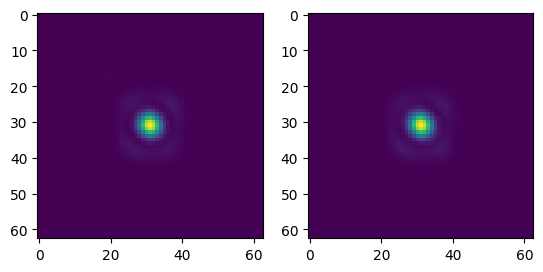

In [24]:
fig, axes = plt.subplots(1, len(psf))

for i, p in enumerate(psf):
    axes[i].imshow(p)
    
psf_filtered = psf[:2]

The following files should be located within the dataset folder (`./data/real/f_dhtau` in this example), using exactly the same names:
- `centered_im.fits`: cube
- `median_unsat.fits`: psf
- `rotnth.fits`: rotation angles

If it is the first time we run the preprocess function, it will compute PCA+ADI using VIP and then store the preprocessed data to avoid preprocessing the dataset again.

We first filter our table to maintain only the coordinates we want to fit.

In [25]:
table = table[table['snr']>3]
table

,x,y,flux,fwhm_mean,snr
1,90.979734,87.349372,31.502232,4.559094,4.930584


Next, we will use the first_guess function to fit our parameters

In [ ]:
%%time
first_guess(table, cube, psf_filtered, 
             window_size=window_size, 
             learning_rate=1e-1, 
             epochs=1e6,
             target_folder='./logs/{}'.format(dataset_name),
             verbose=1)

[INFO] Training (x, y) = (90.98 87.35)
input shape:  (None, 90, 14, 14, 1)
Epoch 1/1000000
1/1 [==============================] - 1s 740ms/step - loss: 360.9286 - flux: 31.6014 - std: 0.1000
Epoch 2/1000000
1/1 [==============================] - 0s 221ms/step - loss: 359.2788 - flux: 31.7009 - std: 0.2000
Epoch 3/1000000
1/1 [==============================] - 0s 188ms/step - loss: 357.6301 - flux: 31.8004 - std: 0.3000
Epoch 4/1000000
1/1 [==============================] - 0s 160ms/step - loss: 355.9825 - flux: 31.8999 - std: 0.4000
Epoch 5/1000000
1/1 [==============================] - 0s 193ms/step - loss: 354.3360 - flux: 31.9995 - std: 0.5000
Epoch 6/1000000
1/1 [==============================] - 0s 146ms/step - loss: 352.6908 - flux: 32.0991 - std: 0.5999
Epoch 7/1000000
1/1 [==============================] - 0s 148ms/step - loss: 351.0467 - flux: 32.1986 - std: 0.6999
Epoch 8/1000000
1/1 [==============================] - 0s 153ms/step - loss: 349.4040 - flux: 32.2981 - std: 0.79

1/1 [==============================] - 0s 160ms/step - loss: 252.2702 - flux: 38.3315 - std: 6.8811
Epoch 71/1000000
1/1 [==============================] - 0s 163ms/step - loss: 250.8278 - flux: 38.4288 - std: 6.9748
Epoch 72/1000000
1/1 [==============================] - 0s 157ms/step - loss: 249.3911 - flux: 38.5262 - std: 7.0683
Epoch 73/1000000
1/1 [==============================] - 0s 160ms/step - loss: 247.9604 - flux: 38.6238 - std: 7.1616
Epoch 74/1000000
1/1 [==============================] - 0s 205ms/step - loss: 246.5356 - flux: 38.7215 - std: 7.2545
Epoch 75/1000000
1/1 [==============================] - 0s 144ms/step - loss: 245.1167 - flux: 38.8194 - std: 7.3472
Epoch 76/1000000
1/1 [==============================] - 0s 152ms/step - loss: 243.7039 - flux: 38.9175 - std: 7.4395
Epoch 77/1000000
1/1 [==============================] - 0s 176ms/step - loss: 242.2973 - flux: 39.0158 - std: 7.5316
Epoch 78/1000000
1/1 [==============================] - 0s 152ms/step - loss: 240

1/1 [==============================] - 0s 164ms/step - loss: 168.6692 - flux: 45.6544 - std: 12.4591
Epoch 140/1000000
1/1 [==============================] - 0s 141ms/step - loss: 167.7272 - flux: 45.7694 - std: 12.5253
Epoch 141/1000000
1/1 [==============================] - 0s 146ms/step - loss: 166.7941 - flux: 45.8847 - std: 12.5910
Epoch 142/1000000
1/1 [==============================] - 0s 151ms/step - loss: 165.8699 - flux: 46.0001 - std: 12.6563
Epoch 143/1000000
1/1 [==============================] - 0s 165ms/step - loss: 164.9547 - flux: 46.1158 - std: 12.7212
Epoch 144/1000000
1/1 [==============================] - 0s 150ms/step - loss: 164.0484 - flux: 46.2315 - std: 12.7857
Epoch 145/1000000
1/1 [==============================] - 0s 156ms/step - loss: 163.1512 - flux: 46.3475 - std: 12.8498
Epoch 146/1000000
1/1 [==============================] - 0s 168ms/step - loss: 162.2630 - flux: 46.4636 - std: 12.9135
Epoch 147/1000000
1/1 [==============================] - 0s 139ms/

Epoch 208/1000000
1/1 [==============================] - 0s 147ms/step - loss: 125.4904 - flux: 53.8742 - std: 15.9990
Epoch 209/1000000
1/1 [==============================] - 0s 149ms/step - loss: 125.1718 - flux: 53.9949 - std: 16.0341
Epoch 210/1000000
1/1 [==============================] - 0s 144ms/step - loss: 124.8604 - flux: 54.1156 - std: 16.0688
Epoch 211/1000000
1/1 [==============================] - 0s 196ms/step - loss: 124.5559 - flux: 54.2362 - std: 16.1030
Epoch 212/1000000
1/1 [==============================] - 0s 156ms/step - loss: 124.2584 - flux: 54.3568 - std: 16.1368
Epoch 213/1000000
1/1 [==============================] - 0s 154ms/step - loss: 123.9678 - flux: 54.4773 - std: 16.1701
Epoch 214/1000000
1/1 [==============================] - 0s 153ms/step - loss: 123.6838 - flux: 54.5977 - std: 16.2029
Epoch 215/1000000
1/1 [==============================] - 0s 153ms/step - loss: 123.4065 - flux: 54.7181 - std: 16.2353
Epoch 216/1000000
1/1 [=========================

1/1 [==============================] - 0s 155ms/step - loss: 115.0570 - flux: 61.8538 - std: 17.4756
Epoch 277/1000000
1/1 [==============================] - 0s 173ms/step - loss: 115.0064 - flux: 61.9664 - std: 17.4864
Epoch 278/1000000
1/1 [==============================] - 0s 179ms/step - loss: 114.9573 - flux: 62.0788 - std: 17.4969
Epoch 279/1000000
1/1 [==============================] - 0s 155ms/step - loss: 114.9096 - flux: 62.1910 - std: 17.5073
Epoch 280/1000000
1/1 [==============================] - 0s 168ms/step - loss: 114.8633 - flux: 62.3031 - std: 17.5174
Epoch 281/1000000
1/1 [==============================] - 0s 159ms/step - loss: 114.8183 - flux: 62.4151 - std: 17.5273
Epoch 282/1000000
1/1 [==============================] - 0s 162ms/step - loss: 114.7745 - flux: 62.5269 - std: 17.5370
Epoch 283/1000000
1/1 [==============================] - 0s 199ms/step - loss: 114.7321 - flux: 62.6385 - std: 17.5465
Epoch 284/1000000
1/1 [==============================] - 0s 164ms/

Epoch 345/1000000
1/1 [==============================] - 0s 155ms/step - loss: 113.4187 - flux: 69.2670 - std: 17.8568
Epoch 346/1000000
1/1 [==============================] - 0s 378ms/step - loss: 113.4078 - flux: 69.3695 - std: 17.8589
Epoch 347/1000000
1/1 [==============================] - 0s 213ms/step - loss: 113.3970 - flux: 69.4718 - std: 17.8610
Epoch 348/1000000
1/1 [==============================] - 0s 161ms/step - loss: 113.3863 - flux: 69.5741 - std: 17.8630
Epoch 349/1000000
1/1 [==============================] - 0s 158ms/step - loss: 113.3758 - flux: 69.6762 - std: 17.8649
Epoch 350/1000000
1/1 [==============================] - 0s 158ms/step - loss: 113.3654 - flux: 69.7782 - std: 17.8668
Epoch 351/1000000
1/1 [==============================] - 0s 147ms/step - loss: 113.3550 - flux: 69.8801 - std: 17.8686
Epoch 352/1000000
1/1 [==============================] - 0s 145ms/step - loss: 113.3448 - flux: 69.9818 - std: 17.8704
Epoch 353/1000000
1/1 [=========================

1/1 [==============================] - 0s 258ms/step - loss: 112.8278 - flux: 75.9621 - std: 17.9211
Epoch 414/1000000
1/1 [==============================] - 0s 148ms/step - loss: 112.8203 - flux: 76.0566 - std: 17.9214
Epoch 415/1000000
1/1 [==============================] - 0s 157ms/step - loss: 112.8128 - flux: 76.1510 - std: 17.9216
Epoch 416/1000000
1/1 [==============================] - 0s 170ms/step - loss: 112.8052 - flux: 76.2453 - std: 17.9219
Epoch 417/1000000
1/1 [==============================] - 0s 162ms/step - loss: 112.7977 - flux: 76.3395 - std: 17.9221
Epoch 418/1000000
1/1 [==============================] - 0s 149ms/step - loss: 112.7903 - flux: 76.4336 - std: 17.9223
Epoch 419/1000000
1/1 [==============================] - 0s 301ms/step - loss: 112.7828 - flux: 76.5276 - std: 17.9225
Epoch 420/1000000
1/1 [==============================] - 0s 210ms/step - loss: 112.7753 - flux: 76.6215 - std: 17.9227
Epoch 421/1000000
1/1 [==============================] - 0s 315ms/

Epoch 482/1000000
1/1 [==============================] - 0s 153ms/step - loss: 112.3375 - flux: 82.2377 - std: 17.9245
Epoch 483/1000000
1/1 [==============================] - 0s 187ms/step - loss: 112.3308 - flux: 82.3250 - std: 17.9244
Epoch 484/1000000
1/1 [==============================] - 0s 160ms/step - loss: 112.3241 - flux: 82.4123 - std: 17.9243
Epoch 485/1000000
1/1 [==============================] - 0s 150ms/step - loss: 112.3174 - flux: 82.4994 - std: 17.9243
Epoch 486/1000000
1/1 [==============================] - 0s 351ms/step - loss: 112.3107 - flux: 82.5865 - std: 17.9242
Epoch 487/1000000
1/1 [==============================] - 0s 273ms/step - loss: 112.3040 - flux: 82.6735 - std: 17.9241
Epoch 488/1000000
1/1 [==============================] - 0s 167ms/step - loss: 112.2973 - flux: 82.7603 - std: 17.9240
Epoch 489/1000000
1/1 [==============================] - 0s 154ms/step - loss: 112.2906 - flux: 82.8471 - std: 17.9239
Epoch 490/1000000
1/1 [=========================

1/1 [==============================] - 0s 155ms/step - loss: 111.9020 - flux: 87.9531 - std: 17.9169
Epoch 551/1000000
1/1 [==============================] - 0s 152ms/step - loss: 111.8959 - flux: 88.0337 - std: 17.9167
Epoch 552/1000000
1/1 [==============================] - 0s 197ms/step - loss: 111.8898 - flux: 88.1143 - std: 17.9166
Epoch 553/1000000
1/1 [==============================] - 0s 168ms/step - loss: 111.8837 - flux: 88.1948 - std: 17.9164
Epoch 554/1000000
1/1 [==============================] - 0s 152ms/step - loss: 111.8777 - flux: 88.2752 - std: 17.9163
Epoch 555/1000000
1/1 [==============================] - 0s 157ms/step - loss: 111.8716 - flux: 88.3556 - std: 17.9162
Epoch 556/1000000
1/1 [==============================] - 0s 152ms/step - loss: 111.8656 - flux: 88.4358 - std: 17.9160
Epoch 557/1000000
1/1 [==============================] - 0s 160ms/step - loss: 111.8595 - flux: 88.5159 - std: 17.9159
Epoch 558/1000000
1/1 [==============================] - 0s 161ms/

Epoch 619/1000000
1/1 [==============================] - 0s 355ms/step - loss: 111.5023 - flux: 93.2990 - std: 17.9066
Epoch 620/1000000
1/1 [==============================] - 0s 160ms/step - loss: 111.4968 - flux: 93.3733 - std: 17.9064
Epoch 621/1000000
1/1 [==============================] - 0s 159ms/step - loss: 111.4913 - flux: 93.4474 - std: 17.9063
Epoch 622/1000000
1/1 [==============================] - 0s 145ms/step - loss: 111.4858 - flux: 93.5215 - std: 17.9061
Epoch 623/1000000
1/1 [==============================] - 0s 205ms/step - loss: 111.4803 - flux: 93.5954 - std: 17.9059
Epoch 624/1000000
1/1 [==============================] - 0s 150ms/step - loss: 111.4749 - flux: 93.6693 - std: 17.9058
Epoch 625/1000000
1/1 [==============================] - 0s 159ms/step - loss: 111.4694 - flux: 93.7430 - std: 17.9056
Epoch 626/1000000
1/1 [==============================] - 0s 151ms/step - loss: 111.4640 - flux: 93.8167 - std: 17.9055
Epoch 627/1000000
1/1 [=========================

1/1 [==============================] - 0s 160ms/step - loss: 111.1471 - flux: 98.1433 - std: 17.8955
Epoch 688/1000000
1/1 [==============================] - 0s 157ms/step - loss: 111.1421 - flux: 98.2116 - std: 17.8953
Epoch 689/1000000
1/1 [==============================] - 0s 177ms/step - loss: 111.1372 - flux: 98.2797 - std: 17.8951
Epoch 690/1000000
1/1 [==============================] - 0s 154ms/step - loss: 111.1322 - flux: 98.3478 - std: 17.8950
Epoch 691/1000000
1/1 [==============================] - 0s 157ms/step - loss: 111.1273 - flux: 98.4158 - std: 17.8948
Epoch 692/1000000
1/1 [==============================] - 0s 163ms/step - loss: 111.1224 - flux: 98.4837 - std: 17.8946
Epoch 693/1000000
1/1 [==============================] - 0s 310ms/step - loss: 111.1175 - flux: 98.5515 - std: 17.8945
Epoch 694/1000000
1/1 [==============================] - 0s 151ms/step - loss: 111.1126 - flux: 98.6192 - std: 17.8943
Epoch 695/1000000
1/1 [==============================] - 0s 178ms/

1/1 [==============================] - 0s 148ms/step - loss: 110.8279 - flux: 102.5939 - std: 17.8839
Epoch 756/1000000
1/1 [==============================] - 0s 162ms/step - loss: 110.8235 - flux: 102.6566 - std: 17.8837
Epoch 757/1000000
1/1 [==============================] - 0s 219ms/step - loss: 110.8190 - flux: 102.7192 - std: 17.8835
Epoch 758/1000000
1/1 [==============================] - 0s 160ms/step - loss: 110.8146 - flux: 102.7817 - std: 17.8834
Epoch 759/1000000
1/1 [==============================] - 0s 149ms/step - loss: 110.8102 - flux: 102.8441 - std: 17.8832
Epoch 760/1000000
1/1 [==============================] - 0s 179ms/step - loss: 110.8058 - flux: 102.9064 - std: 17.8830
Epoch 761/1000000
1/1 [==============================] - 0s 153ms/step - loss: 110.8014 - flux: 102.9687 - std: 17.8828
Epoch 762/1000000
1/1 [==============================] - 0s 165ms/step - loss: 110.7970 - flux: 103.0309 - std: 17.8827
Epoch 763/1000000
1/1 [==============================] - 0

1/1 [==============================] - 0s 356ms/step - loss: 110.5426 - flux: 106.6811 - std: 17.8720
Epoch 824/1000000
1/1 [==============================] - 0s 152ms/step - loss: 110.5386 - flux: 106.7386 - std: 17.8718
Epoch 825/1000000
1/1 [==============================] - 0s 145ms/step - loss: 110.5347 - flux: 106.7961 - std: 17.8717
Epoch 826/1000000
1/1 [==============================] - 0s 149ms/step - loss: 110.5307 - flux: 106.8535 - std: 17.8715
Epoch 827/1000000
1/1 [==============================] - 0s 152ms/step - loss: 110.5268 - flux: 106.9109 - std: 17.8713
Epoch 828/1000000
1/1 [==============================] - 0s 157ms/step - loss: 110.5229 - flux: 106.9681 - std: 17.8711
Epoch 829/1000000
1/1 [==============================] - 0s 159ms/step - loss: 110.5189 - flux: 107.0253 - std: 17.8710
Epoch 830/1000000
1/1 [==============================] - 0s 159ms/step - loss: 110.5150 - flux: 107.0824 - std: 17.8708
Epoch 831/1000000
1/1 [==============================] - 0

1/1 [==============================] - 0s 152ms/step - loss: 110.2890 - flux: 110.4353 - std: 17.8600
Epoch 892/1000000
1/1 [==============================] - 0s 176ms/step - loss: 110.2855 - flux: 110.4882 - std: 17.8599
Epoch 893/1000000
1/1 [==============================] - 0s 152ms/step - loss: 110.2820 - flux: 110.5410 - std: 17.8597
Epoch 894/1000000
1/1 [==============================] - 0s 154ms/step - loss: 110.2785 - flux: 110.5937 - std: 17.8595
Epoch 895/1000000
1/1 [==============================] - 0s 189ms/step - loss: 110.2751 - flux: 110.6464 - std: 17.8593
Epoch 896/1000000
1/1 [==============================] - 0s 146ms/step - loss: 110.2716 - flux: 110.6990 - std: 17.8591
Epoch 897/1000000
1/1 [==============================] - 0s 147ms/step - loss: 110.2681 - flux: 110.7515 - std: 17.8590
Epoch 898/1000000
1/1 [==============================] - 0s 147ms/step - loss: 110.2647 - flux: 110.8040 - std: 17.8588
Epoch 899/1000000
1/1 [==============================] - 0

1/1 [==============================] - 0s 150ms/step - loss: 110.0653 - flux: 113.8844 - std: 17.8481
Epoch 960/1000000
1/1 [==============================] - 0s 152ms/step - loss: 110.0622 - flux: 113.9330 - std: 17.8479
Epoch 961/1000000
1/1 [==============================] - 0s 156ms/step - loss: 110.0591 - flux: 113.9815 - std: 17.8477
Epoch 962/1000000
1/1 [==============================] - 0s 155ms/step - loss: 110.0561 - flux: 114.0299 - std: 17.8475
Epoch 963/1000000
1/1 [==============================] - 0s 150ms/step - loss: 110.0530 - flux: 114.0783 - std: 17.8474
Epoch 964/1000000
1/1 [==============================] - 0s 145ms/step - loss: 110.0499 - flux: 114.1266 - std: 17.8472
Epoch 965/1000000
1/1 [==============================] - 0s 148ms/step - loss: 110.0469 - flux: 114.1749 - std: 17.8470
Epoch 966/1000000
1/1 [==============================] - 0s 154ms/step - loss: 110.0439 - flux: 114.2231 - std: 17.8468
Epoch 967/1000000
1/1 [==============================] - 0

1/1 [==============================] - 0s 172ms/step - loss: 109.8693 - flux: 117.0523 - std: 17.8362
Epoch 1028/1000000
1/1 [==============================] - 0s 165ms/step - loss: 109.8666 - flux: 117.0969 - std: 17.8360
Epoch 1029/1000000
1/1 [==============================] - 0s 278ms/step - loss: 109.8639 - flux: 117.1414 - std: 17.8359
Epoch 1030/1000000
1/1 [==============================] - 0s 159ms/step - loss: 109.8612 - flux: 117.1859 - std: 17.8357
Epoch 1031/1000000
1/1 [==============================] - 0s 210ms/step - loss: 109.8586 - flux: 117.2303 - std: 17.8355
Epoch 1032/1000000
1/1 [==============================] - 0s 153ms/step - loss: 109.8559 - flux: 117.2747 - std: 17.8353
Epoch 1033/1000000
1/1 [==============================] - 0s 153ms/step - loss: 109.8532 - flux: 117.3190 - std: 17.8352
Epoch 1034/1000000
1/1 [==============================] - 0s 151ms/step - loss: 109.8506 - flux: 117.3633 - std: 17.8350
Epoch 1035/1000000
1/1 [===========================

1/1 [==============================] - 0s 159ms/step - loss: 109.7013 - flux: 119.9182 - std: 17.8247
Epoch 1095/1000000
1/1 [==============================] - 0s 152ms/step - loss: 109.6989 - flux: 119.9591 - std: 17.8245
Epoch 1096/1000000
1/1 [==============================] - 0s 152ms/step - loss: 109.6966 - flux: 120.0000 - std: 17.8244
Epoch 1097/1000000
1/1 [==============================] - 0s 153ms/step - loss: 109.6943 - flux: 120.0408 - std: 17.8242
Epoch 1098/1000000
1/1 [==============================] - 0s 152ms/step - loss: 109.6920 - flux: 120.0816 - std: 17.8240
Epoch 1099/1000000
1/1 [==============================] - 0s 141ms/step - loss: 109.6897 - flux: 120.1223 - std: 17.8239
Epoch 1100/1000000
1/1 [==============================] - 0s 150ms/step - loss: 109.6873 - flux: 120.1630 - std: 17.8237
Epoch 1101/1000000
1/1 [==============================] - 0s 152ms/step - loss: 109.6851 - flux: 120.2036 - std: 17.8235
Epoch 1102/1000000
1/1 [===========================

1/1 [==============================] - 0s 150ms/step - loss: 109.5561 - flux: 122.5465 - std: 17.8135
Epoch 1162/1000000
1/1 [==============================] - 0s 151ms/step - loss: 109.5541 - flux: 122.5840 - std: 17.8133
Epoch 1163/1000000
1/1 [==============================] - 0s 149ms/step - loss: 109.5521 - flux: 122.6215 - std: 17.8132
Epoch 1164/1000000
1/1 [==============================] - 0s 154ms/step - loss: 109.5501 - flux: 122.6588 - std: 17.8130
Epoch 1165/1000000
1/1 [==============================] - 0s 254ms/step - loss: 109.5481 - flux: 122.6962 - std: 17.8128
Epoch 1166/1000000
1/1 [==============================] - 0s 143ms/step - loss: 109.5461 - flux: 122.7335 - std: 17.8127
Epoch 1167/1000000
1/1 [==============================] - 0s 158ms/step - loss: 109.5441 - flux: 122.7708 - std: 17.8125
Epoch 1168/1000000
1/1 [==============================] - 0s 145ms/step - loss: 109.5422 - flux: 122.8080 - std: 17.8123
Epoch 1169/1000000
1/1 [===========================

1/1 [==============================] - 0s 143ms/step - loss: 109.4317 - flux: 124.9509 - std: 17.8027
Epoch 1229/1000000
1/1 [==============================] - 0s 206ms/step - loss: 109.4300 - flux: 124.9852 - std: 17.8025
Epoch 1230/1000000
1/1 [==============================] - 0s 148ms/step - loss: 109.4283 - flux: 125.0194 - std: 17.8023
Epoch 1231/1000000
1/1 [==============================] - 0s 150ms/step - loss: 109.4266 - flux: 125.0536 - std: 17.8022
Epoch 1232/1000000
1/1 [==============================] - 0s 150ms/step - loss: 109.4249 - flux: 125.0877 - std: 17.8020
Epoch 1233/1000000
1/1 [==============================] - 0s 158ms/step - loss: 109.4232 - flux: 125.1217 - std: 17.8019
Epoch 1234/1000000
1/1 [==============================] - 0s 143ms/step - loss: 109.4215 - flux: 125.1558 - std: 17.8017
Epoch 1235/1000000
1/1 [==============================] - 0s 148ms/step - loss: 109.4198 - flux: 125.1897 - std: 17.8015
Epoch 1236/1000000
1/1 [===========================

1/1 [==============================] - 0s 155ms/step - loss: 109.3260 - flux: 127.1435 - std: 17.7922
Epoch 1296/1000000
1/1 [==============================] - 0s 170ms/step - loss: 109.3245 - flux: 127.1747 - std: 17.7921
Epoch 1297/1000000
1/1 [==============================] - 0s 157ms/step - loss: 109.3231 - flux: 127.2058 - std: 17.7919
Epoch 1298/1000000
1/1 [==============================] - 0s 157ms/step - loss: 109.3216 - flux: 127.2369 - std: 17.7918
Epoch 1299/1000000
1/1 [==============================] - 0s 155ms/step - loss: 109.3202 - flux: 127.2680 - std: 17.7916
Epoch 1300/1000000
1/1 [==============================] - 0s 152ms/step - loss: 109.3188 - flux: 127.2990 - std: 17.7915
Epoch 1301/1000000
1/1 [==============================] - 0s 155ms/step - loss: 109.3173 - flux: 127.3299 - std: 17.7913
Epoch 1302/1000000
1/1 [==============================] - 0s 152ms/step - loss: 109.3159 - flux: 127.3608 - std: 17.7912
Epoch 1303/1000000
1/1 [===========================

1/1 [==============================] - 0s 152ms/step - loss: 109.2369 - flux: 129.1355 - std: 17.7823
Epoch 1363/1000000
1/1 [==============================] - 0s 320ms/step - loss: 109.2357 - flux: 129.1638 - std: 17.7822
Epoch 1364/1000000
1/1 [==============================] - 0s 147ms/step - loss: 109.2345 - flux: 129.1920 - std: 17.7821
Epoch 1365/1000000
1/1 [==============================] - 0s 149ms/step - loss: 109.2332 - flux: 129.2202 - std: 17.7819
Epoch 1366/1000000
1/1 [==============================] - 0s 159ms/step - loss: 109.2320 - flux: 129.2484 - std: 17.7818
Epoch 1367/1000000
1/1 [==============================] - 0s 151ms/step - loss: 109.2308 - flux: 129.2765 - std: 17.7816
Epoch 1368/1000000
1/1 [==============================] - 0s 141ms/step - loss: 109.2296 - flux: 129.3045 - std: 17.7815
Epoch 1369/1000000
1/1 [==============================] - 0s 157ms/step - loss: 109.2284 - flux: 129.3325 - std: 17.7813
Epoch 1370/1000000
1/1 [===========================

1/1 [==============================] - 0s 146ms/step - loss: 109.1624 - flux: 130.9378 - std: 17.7730
Epoch 1430/1000000
1/1 [==============================] - 0s 145ms/step - loss: 109.1614 - flux: 130.9633 - std: 17.7729
Epoch 1431/1000000
1/1 [==============================] - 0s 154ms/step - loss: 109.1604 - flux: 130.9888 - std: 17.7727
Epoch 1432/1000000
1/1 [==============================] - 0s 158ms/step - loss: 109.1594 - flux: 131.0142 - std: 17.7726
Epoch 1433/1000000
1/1 [==============================] - 0s 152ms/step - loss: 109.1584 - flux: 131.0396 - std: 17.7725
Epoch 1434/1000000
1/1 [==============================] - 0s 168ms/step - loss: 109.1574 - flux: 131.0650 - std: 17.7723
Epoch 1435/1000000
1/1 [==============================] - 0s 156ms/step - loss: 109.1564 - flux: 131.0903 - std: 17.7722
Epoch 1436/1000000
1/1 [==============================] - 0s 145ms/step - loss: 109.1554 - flux: 131.1156 - std: 17.7721
Epoch 1437/1000000
1/1 [===========================

1/1 [==============================] - 0s 150ms/step - loss: 109.1007 - flux: 132.5610 - std: 17.7643
Epoch 1497/1000000
1/1 [==============================] - 0s 143ms/step - loss: 109.0999 - flux: 132.5839 - std: 17.7642
Epoch 1498/1000000
1/1 [==============================] - 0s 153ms/step - loss: 109.0991 - flux: 132.6068 - std: 17.7640
Epoch 1499/1000000
1/1 [==============================] - 0s 155ms/step - loss: 109.0983 - flux: 132.6297 - std: 17.7639
Epoch 1500/1000000
1/1 [==============================] - 0s 154ms/step - loss: 109.0974 - flux: 132.6525 - std: 17.7638
Epoch 1501/1000000
1/1 [==============================] - 0s 201ms/step - loss: 109.0966 - flux: 132.6752 - std: 17.7637
Epoch 1502/1000000
1/1 [==============================] - 0s 192ms/step - loss: 109.0958 - flux: 132.6980 - std: 17.7635
Epoch 1503/1000000
1/1 [==============================] - 0s 156ms/step - loss: 109.0950 - flux: 132.7207 - std: 17.7634
Epoch 1504/1000000
1/1 [===========================

1/1 [==============================] - 0s 144ms/step - loss: 109.0501 - flux: 134.0159 - std: 17.7562
Epoch 1564/1000000
1/1 [==============================] - 0s 152ms/step - loss: 109.0494 - flux: 134.0364 - std: 17.7561
Epoch 1565/1000000
1/1 [==============================] - 0s 153ms/step - loss: 109.0487 - flux: 134.0569 - std: 17.7560
Epoch 1566/1000000
1/1 [==============================] - 0s 154ms/step - loss: 109.0480 - flux: 134.0773 - std: 17.7559
Epoch 1567/1000000
1/1 [==============================] - 0s 154ms/step - loss: 109.0474 - flux: 134.0977 - std: 17.7557
Epoch 1568/1000000
1/1 [==============================] - 0s 202ms/step - loss: 109.0467 - flux: 134.1181 - std: 17.7556
Epoch 1569/1000000
1/1 [==============================] - 0s 162ms/step - loss: 109.0460 - flux: 134.1384 - std: 17.7555
Epoch 1570/1000000
1/1 [==============================] - 0s 148ms/step - loss: 109.0453 - flux: 134.1587 - std: 17.7554
Epoch 1571/1000000
1/1 [===========================

1/1 [==============================] - 0s 160ms/step - loss: 109.0088 - flux: 135.3136 - std: 17.7488
Epoch 1631/1000000
1/1 [==============================] - 0s 156ms/step - loss: 109.0082 - flux: 135.3318 - std: 17.7487
Epoch 1632/1000000
1/1 [==============================] - 0s 151ms/step - loss: 109.0076 - flux: 135.3500 - std: 17.7486
Epoch 1633/1000000
1/1 [==============================] - 0s 151ms/step - loss: 109.0071 - flux: 135.3682 - std: 17.7485
Epoch 1634/1000000
1/1 [==============================] - 0s 261ms/step - loss: 109.0066 - flux: 135.3863 - std: 17.7484
Epoch 1635/1000000
1/1 [==============================] - 0s 155ms/step - loss: 109.0060 - flux: 135.4044 - std: 17.7483
Epoch 1636/1000000
1/1 [==============================] - 0s 156ms/step - loss: 109.0054 - flux: 135.4225 - std: 17.7481
Epoch 1637/1000000
1/1 [==============================] - 0s 198ms/step - loss: 109.0049 - flux: 135.4405 - std: 17.7480
Epoch 1638/1000000
1/1 [===========================

1/1 [==============================] - 0s 170ms/step - loss: 108.9754 - flux: 136.4649 - std: 17.7420
Epoch 1698/1000000
1/1 [==============================] - 0s 159ms/step - loss: 108.9749 - flux: 136.4810 - std: 17.7419
Epoch 1699/1000000
1/1 [==============================] - 0s 219ms/step - loss: 108.9745 - flux: 136.4971 - std: 17.7418
Epoch 1700/1000000
1/1 [==============================] - 0s 163ms/step - loss: 108.9740 - flux: 136.5132 - std: 17.7417
Epoch 1701/1000000
1/1 [==============================] - 0s 159ms/step - loss: 108.9736 - flux: 136.5292 - std: 17.7416
Epoch 1702/1000000
1/1 [==============================] - 0s 154ms/step - loss: 108.9731 - flux: 136.5453 - std: 17.7415
Epoch 1703/1000000
1/1 [==============================] - 0s 162ms/step - loss: 108.9727 - flux: 136.5612 - std: 17.7414
Epoch 1704/1000000
1/1 [==============================] - 0s 153ms/step - loss: 108.9723 - flux: 136.5772 - std: 17.7413
Epoch 1705/1000000
1/1 [===========================

1/1 [==============================] - 0s 157ms/step - loss: 108.9486 - flux: 137.4810 - std: 17.7359
Epoch 1765/1000000
1/1 [==============================] - 0s 154ms/step - loss: 108.9482 - flux: 137.4952 - std: 17.7358
Epoch 1766/1000000
1/1 [==============================] - 0s 182ms/step - loss: 108.9479 - flux: 137.5094 - std: 17.7357
Epoch 1767/1000000
1/1 [==============================] - 0s 192ms/step - loss: 108.9475 - flux: 137.5235 - std: 17.7356
Epoch 1768/1000000
1/1 [==============================] - 0s 154ms/step - loss: 108.9472 - flux: 137.5377 - std: 17.7355
Epoch 1769/1000000
1/1 [==============================] - 0s 148ms/step - loss: 108.9468 - flux: 137.5517 - std: 17.7355
Epoch 1770/1000000
1/1 [==============================] - 0s 199ms/step - loss: 108.9465 - flux: 137.5658 - std: 17.7354
Epoch 1771/1000000
1/1 [==============================] - 0s 154ms/step - loss: 108.9461 - flux: 137.5798 - std: 17.7353
Epoch 1772/1000000
1/1 [===========================

1/1 [==============================] - 0s 153ms/step - loss: 108.9273 - flux: 138.3730 - std: 17.7304
Epoch 1832/1000000
1/1 [==============================] - 0s 148ms/step - loss: 108.9270 - flux: 138.3854 - std: 17.7303
Epoch 1833/1000000
1/1 [==============================] - 0s 143ms/step - loss: 108.9267 - flux: 138.3978 - std: 17.7302
Epoch 1834/1000000
1/1 [==============================] - 0s 150ms/step - loss: 108.9265 - flux: 138.4102 - std: 17.7302
Epoch 1835/1000000
1/1 [==============================] - 0s 141ms/step - loss: 108.9262 - flux: 138.4226 - std: 17.7301
Epoch 1836/1000000
1/1 [==============================] - 0s 143ms/step - loss: 108.9259 - flux: 138.4349 - std: 17.7300
Epoch 1837/1000000
1/1 [==============================] - 0s 153ms/step - loss: 108.9256 - flux: 138.4472 - std: 17.7299
Epoch 1838/1000000
1/1 [==============================] - 0s 152ms/step - loss: 108.9254 - flux: 138.4595 - std: 17.7299
Epoch 1839/1000000
1/1 [===========================

1/1 [==============================] - 0s 152ms/step - loss: 108.9105 - flux: 139.1517 - std: 17.7255
Epoch 1899/1000000
1/1 [==============================] - 0s 146ms/step - loss: 108.9103 - flux: 139.1626 - std: 17.7254
Epoch 1900/1000000
1/1 [==============================] - 0s 152ms/step - loss: 108.9100 - flux: 139.1734 - std: 17.7254
Epoch 1901/1000000
1/1 [==============================] - 0s 141ms/step - loss: 108.9098 - flux: 139.1841 - std: 17.7253
Epoch 1902/1000000
1/1 [==============================] - 0s 151ms/step - loss: 108.9096 - flux: 139.1949 - std: 17.7252
Epoch 1903/1000000
1/1 [==============================] - 0s 152ms/step - loss: 108.9094 - flux: 139.2056 - std: 17.7252
Epoch 1904/1000000
1/1 [==============================] - 0s 154ms/step - loss: 108.9092 - flux: 139.2163 - std: 17.7251
Epoch 1905/1000000
1/1 [==============================] - 0s 153ms/step - loss: 108.9090 - flux: 139.2270 - std: 17.7250
Epoch 1906/1000000
1/1 [===========================

1/1 [==============================] - 0s 212ms/step - loss: 108.8973 - flux: 139.8279 - std: 17.7212
Epoch 1966/1000000
1/1 [==============================] - 0s 161ms/step - loss: 108.8971 - flux: 139.8372 - std: 17.7211
Epoch 1967/1000000
1/1 [==============================] - 0s 163ms/step - loss: 108.8970 - flux: 139.8466 - std: 17.7211
Epoch 1968/1000000
1/1 [==============================] - 0s 157ms/step - loss: 108.8968 - flux: 139.8559 - std: 17.7210
Epoch 1969/1000000
1/1 [==============================] - 0s 146ms/step - loss: 108.8966 - flux: 139.8652 - std: 17.7210
Epoch 1970/1000000
1/1 [==============================] - 0s 153ms/step - loss: 108.8965 - flux: 139.8745 - std: 17.7209
Epoch 1971/1000000
1/1 [==============================] - 0s 152ms/step - loss: 108.8963 - flux: 139.8838 - std: 17.7208
Epoch 1972/1000000
1/1 [==============================] - 0s 158ms/step - loss: 108.8961 - flux: 139.8930 - std: 17.7208
Epoch 1973/1000000
1/1 [===========================

1/1 [==============================] - 0s 192ms/step - loss: 108.8871 - flux: 140.4117 - std: 17.7174
Epoch 2033/1000000
1/1 [==============================] - 0s 161ms/step - loss: 108.8869 - flux: 140.4198 - std: 17.7174
Epoch 2034/1000000
1/1 [==============================] - 0s 163ms/step - loss: 108.8868 - flux: 140.4278 - std: 17.7173
Epoch 2035/1000000
1/1 [==============================] - 0s 160ms/step - loss: 108.8867 - flux: 140.4359 - std: 17.7173
Epoch 2036/1000000
1/1 [==============================] - 0s 160ms/step - loss: 108.8865 - flux: 140.4439 - std: 17.7172
Epoch 2037/1000000
1/1 [==============================] - 0s 156ms/step - loss: 108.8864 - flux: 140.4519 - std: 17.7171
Epoch 2038/1000000
1/1 [==============================] - 0s 158ms/step - loss: 108.8863 - flux: 140.4599 - std: 17.7171
Epoch 2039/1000000
1/1 [==============================] - 0s 199ms/step - loss: 108.8861 - flux: 140.4678 - std: 17.7170
Epoch 2040/1000000
1/1 [===========================

1/1 [==============================] - 0s 144ms/step - loss: 108.8791 - flux: 140.9131 - std: 17.7141
Epoch 2100/1000000
1/1 [==============================] - 0s 151ms/step - loss: 108.8790 - flux: 140.9200 - std: 17.7141
Epoch 2101/1000000
1/1 [==============================] - 0s 152ms/step - loss: 108.8789 - flux: 140.9269 - std: 17.7140
Epoch 2102/1000000
1/1 [==============================] - 0s 155ms/step - loss: 108.8788 - flux: 140.9338 - std: 17.7140
Epoch 2103/1000000
1/1 [==============================] - 0s 153ms/step - loss: 108.8787 - flux: 140.9407 - std: 17.7139
Epoch 2104/1000000
1/1 [==============================] - 0s 156ms/step - loss: 108.8786 - flux: 140.9475 - std: 17.7139
Epoch 2105/1000000
1/1 [==============================] - 0s 150ms/step - loss: 108.8785 - flux: 140.9543 - std: 17.7138
Epoch 2106/1000000
1/1 [==============================] - 0s 156ms/step - loss: 108.8784 - flux: 140.9612 - std: 17.7138
Epoch 2107/1000000
1/1 [===========================

1/1 [==============================] - 0s 141ms/step - loss: 108.8730 - flux: 141.3414 - std: 17.7113
Epoch 2167/1000000
1/1 [==============================] - 0s 164ms/step - loss: 108.8730 - flux: 141.3473 - std: 17.7112
Epoch 2168/1000000
1/1 [==============================] - 0s 170ms/step - loss: 108.8729 - flux: 141.3531 - std: 17.7112
Epoch 2169/1000000
1/1 [==============================] - 0s 150ms/step - loss: 108.8728 - flux: 141.3590 - std: 17.7112
Epoch 2170/1000000
1/1 [==============================] - 0s 189ms/step - loss: 108.8727 - flux: 141.3648 - std: 17.7111
Epoch 2171/1000000
1/1 [==============================] - 0s 157ms/step - loss: 108.8727 - flux: 141.3707 - std: 17.7111
Epoch 2172/1000000
1/1 [==============================] - 0s 158ms/step - loss: 108.8726 - flux: 141.3765 - std: 17.7110
Epoch 2173/1000000
1/1 [==============================] - 0s 165ms/step - loss: 108.8725 - flux: 141.3823 - std: 17.7110
Epoch 2174/1000000
1/1 [===========================

## Visualizing results

In [ ]:
table

In [10]:
index = 1
model_path = f'./logs/{dataset_name}/flux_model_{index}/'

KeyError: 'Key epoch_flux was not found in Reservoir'

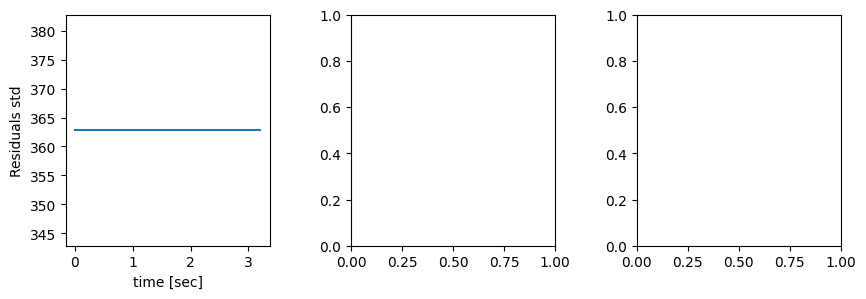

In [12]:
fig, axes = plt.subplots(1, 3, figsize=(10, 3),
                         gridspec_kw={'hspace': 0, 'wspace': 0.4})

ylabels = ['Residuals std', 'Predicted Flux', 'Noise']
for i, metric in enumerate(['epoch_loss', 'epoch_flux', 'epoch_std']):
    train_metrics = get_metrics(f'{model_path}/logs/train/', show_keys=False, metric_name=metric)
    
    time = (train_metrics['wall_time'].values -train_metrics['wall_time'].values[0]) 
    axes[i].plot(time, train_metrics['value'].values)
    axes[i].set_xlabel('time [sec]')
    axes[i].set_ylabel(ylabels[i])


In [13]:
from core.engine import inference_step

In [15]:
fake_comp, real_comp, fluxes, model = inference_step(cube, psf_filtered, table.iloc[0]['x'], table.iloc[0]['y'], 
                                              model_path=model_path, window_size=window_size)

input shape:  (None, 90, 14, 14, 1)
1/1 [==============================] - 0s 376ms/step


In [17]:
shift_coords = model.trainable_variables[-1]

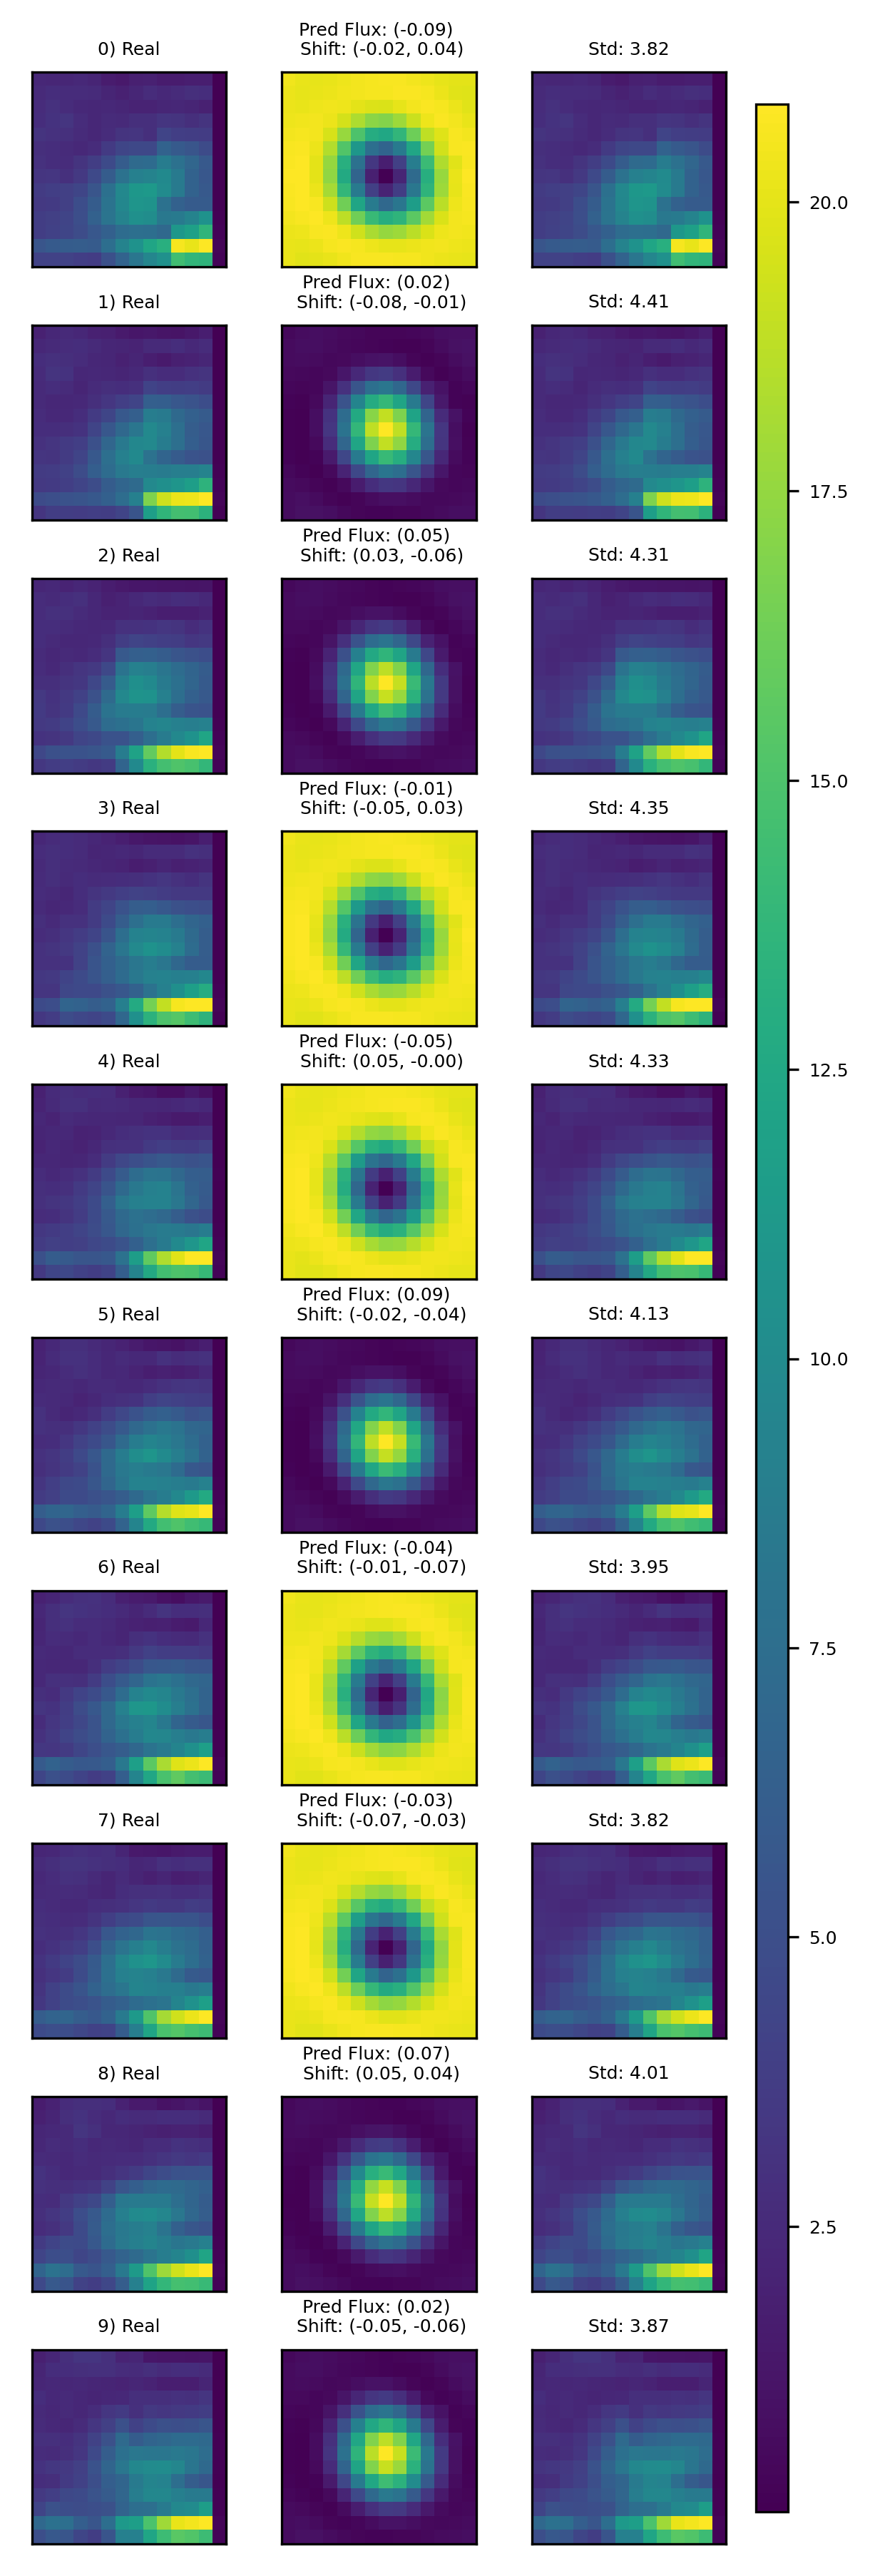

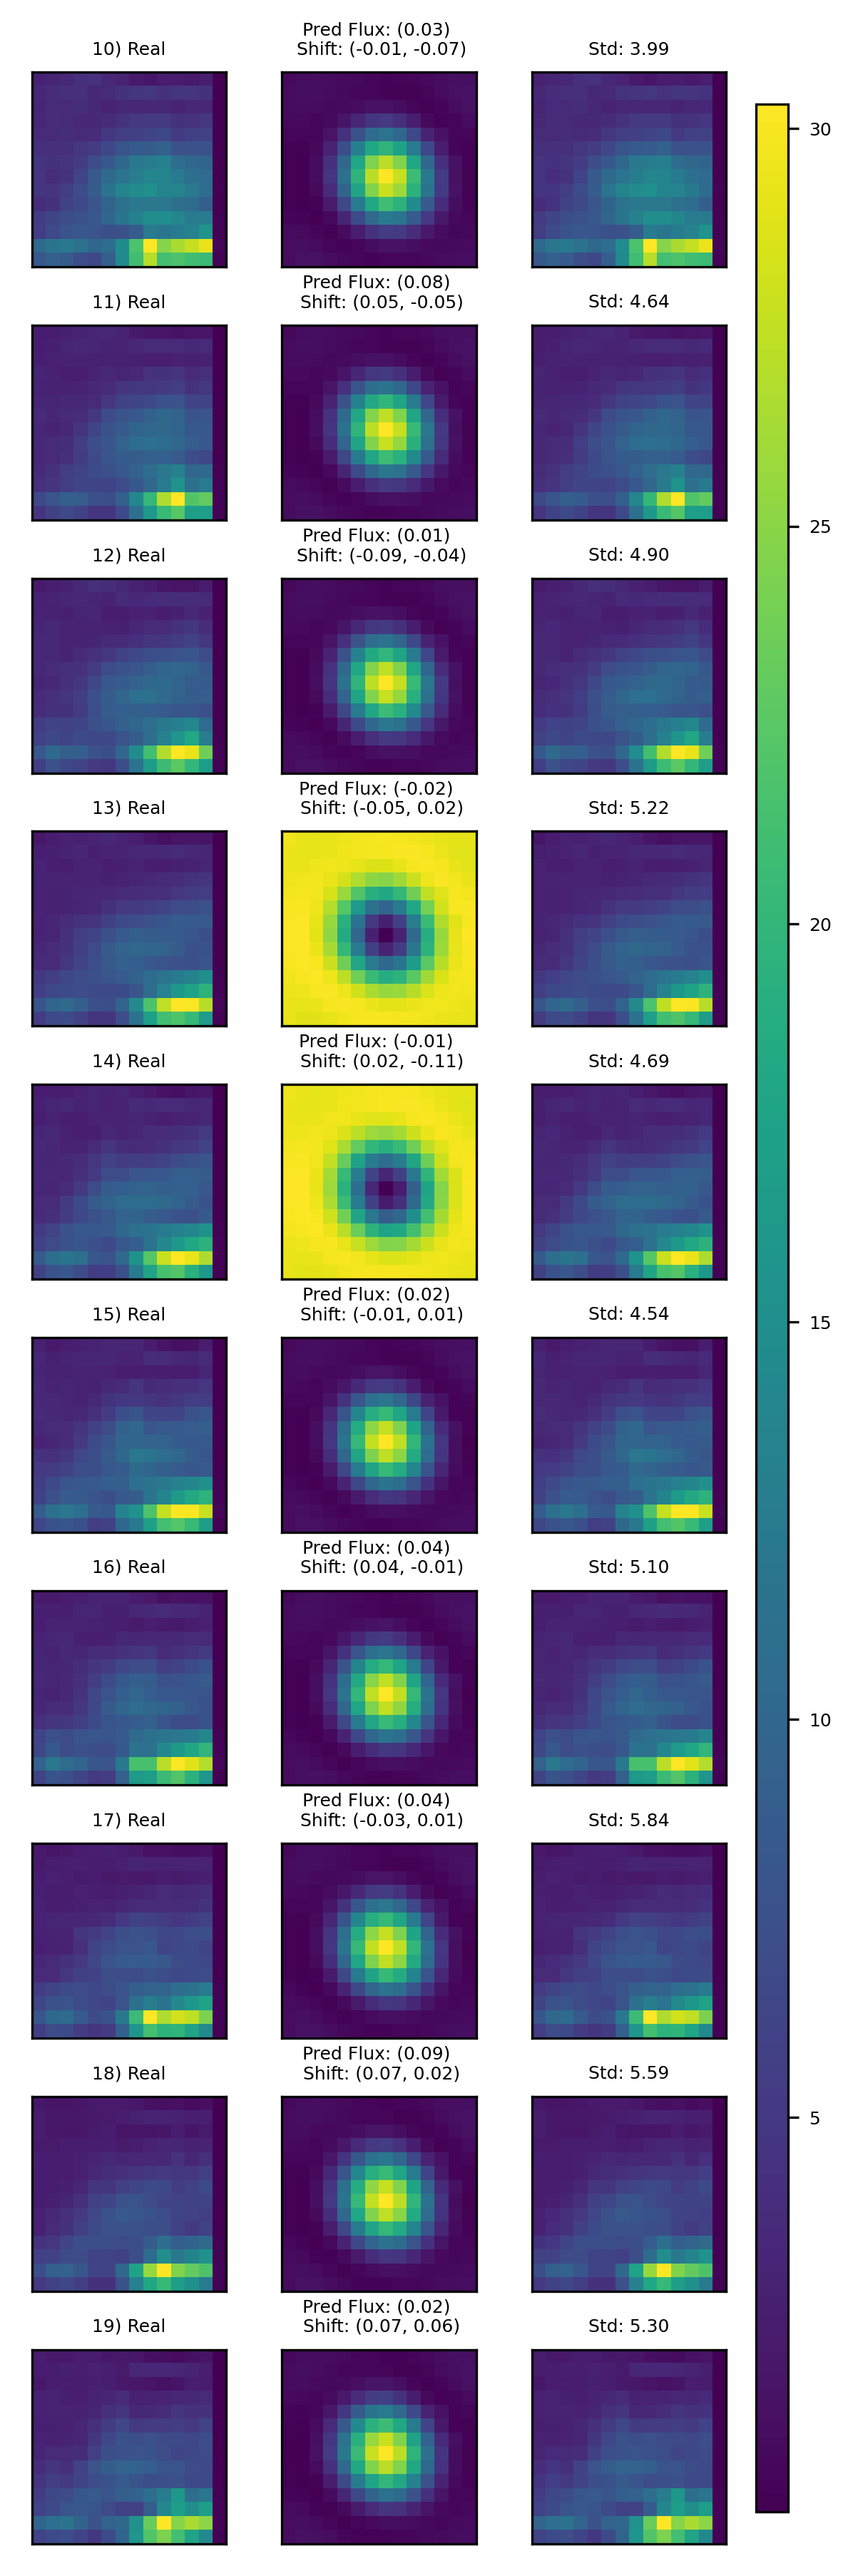

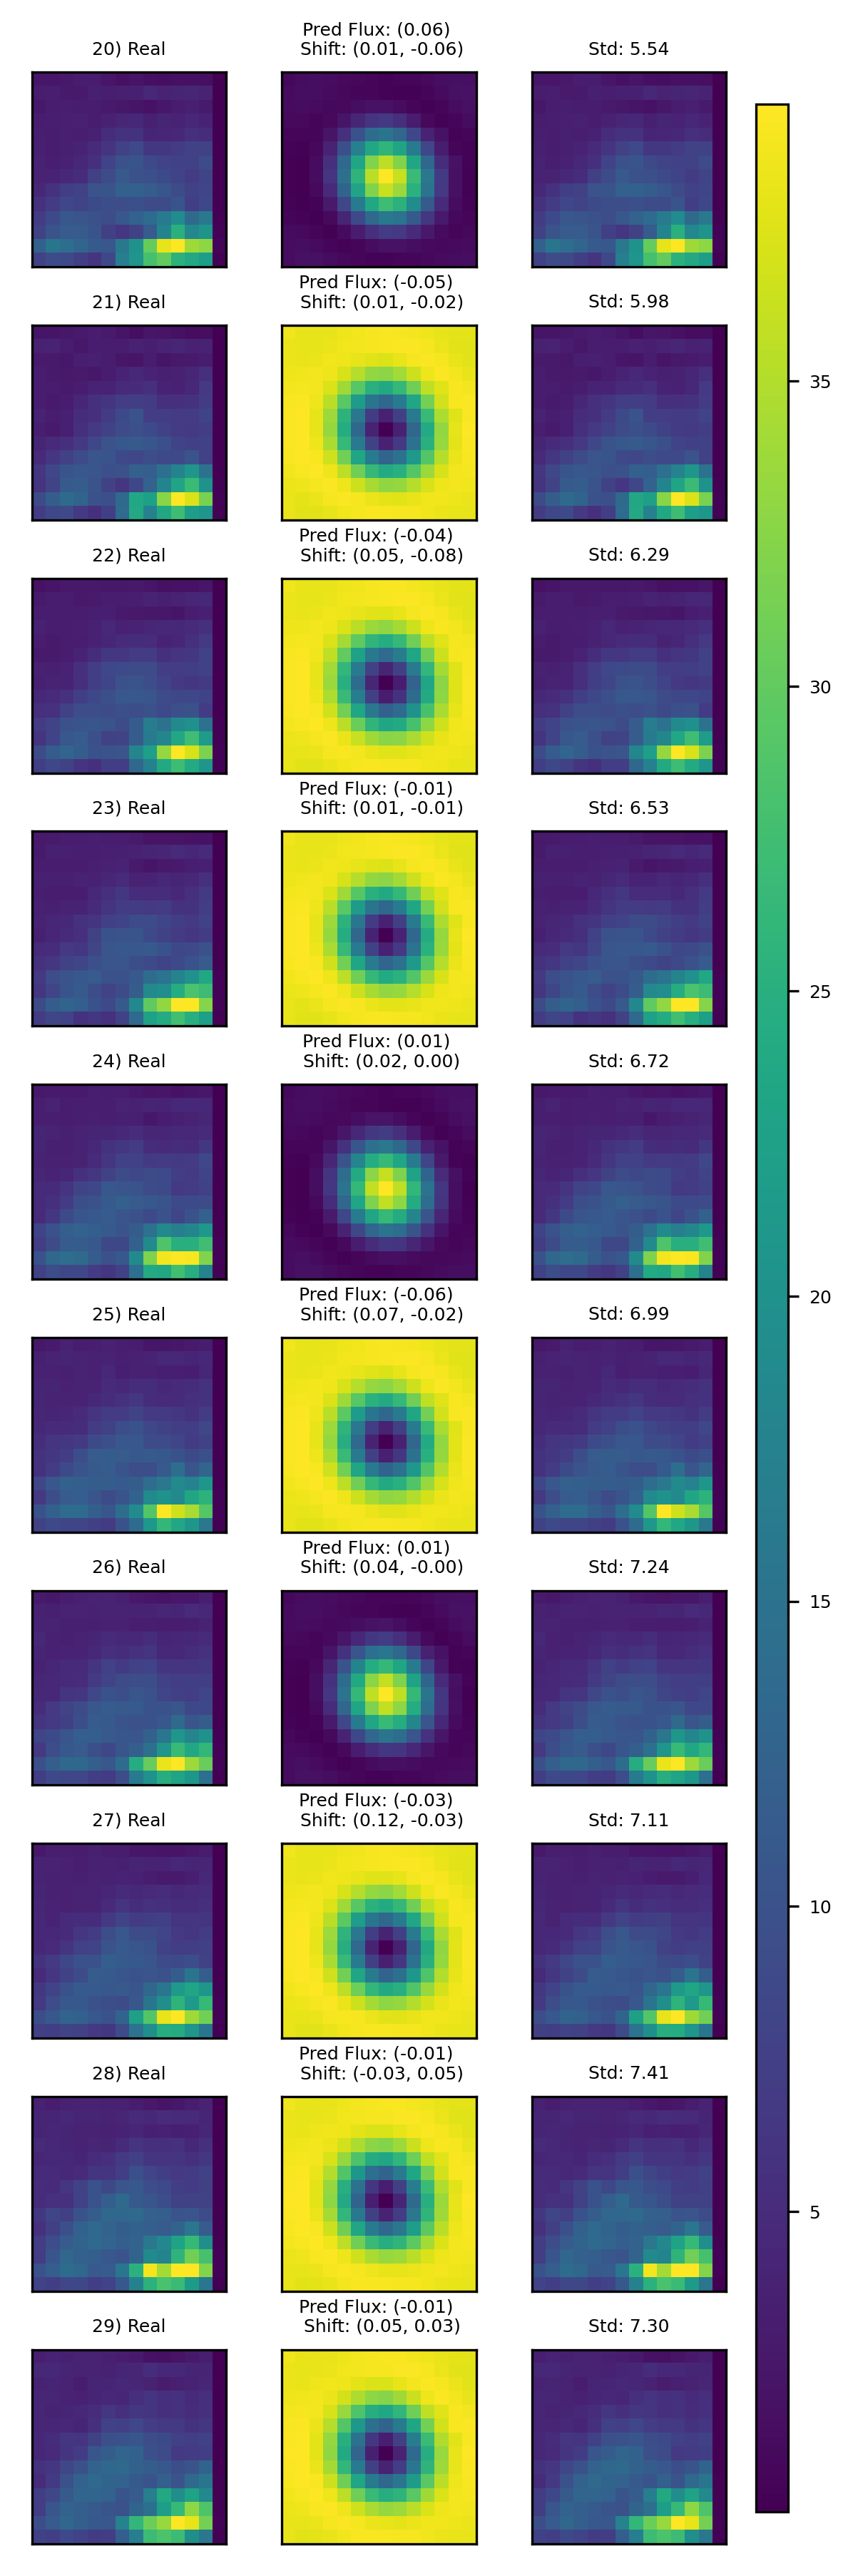

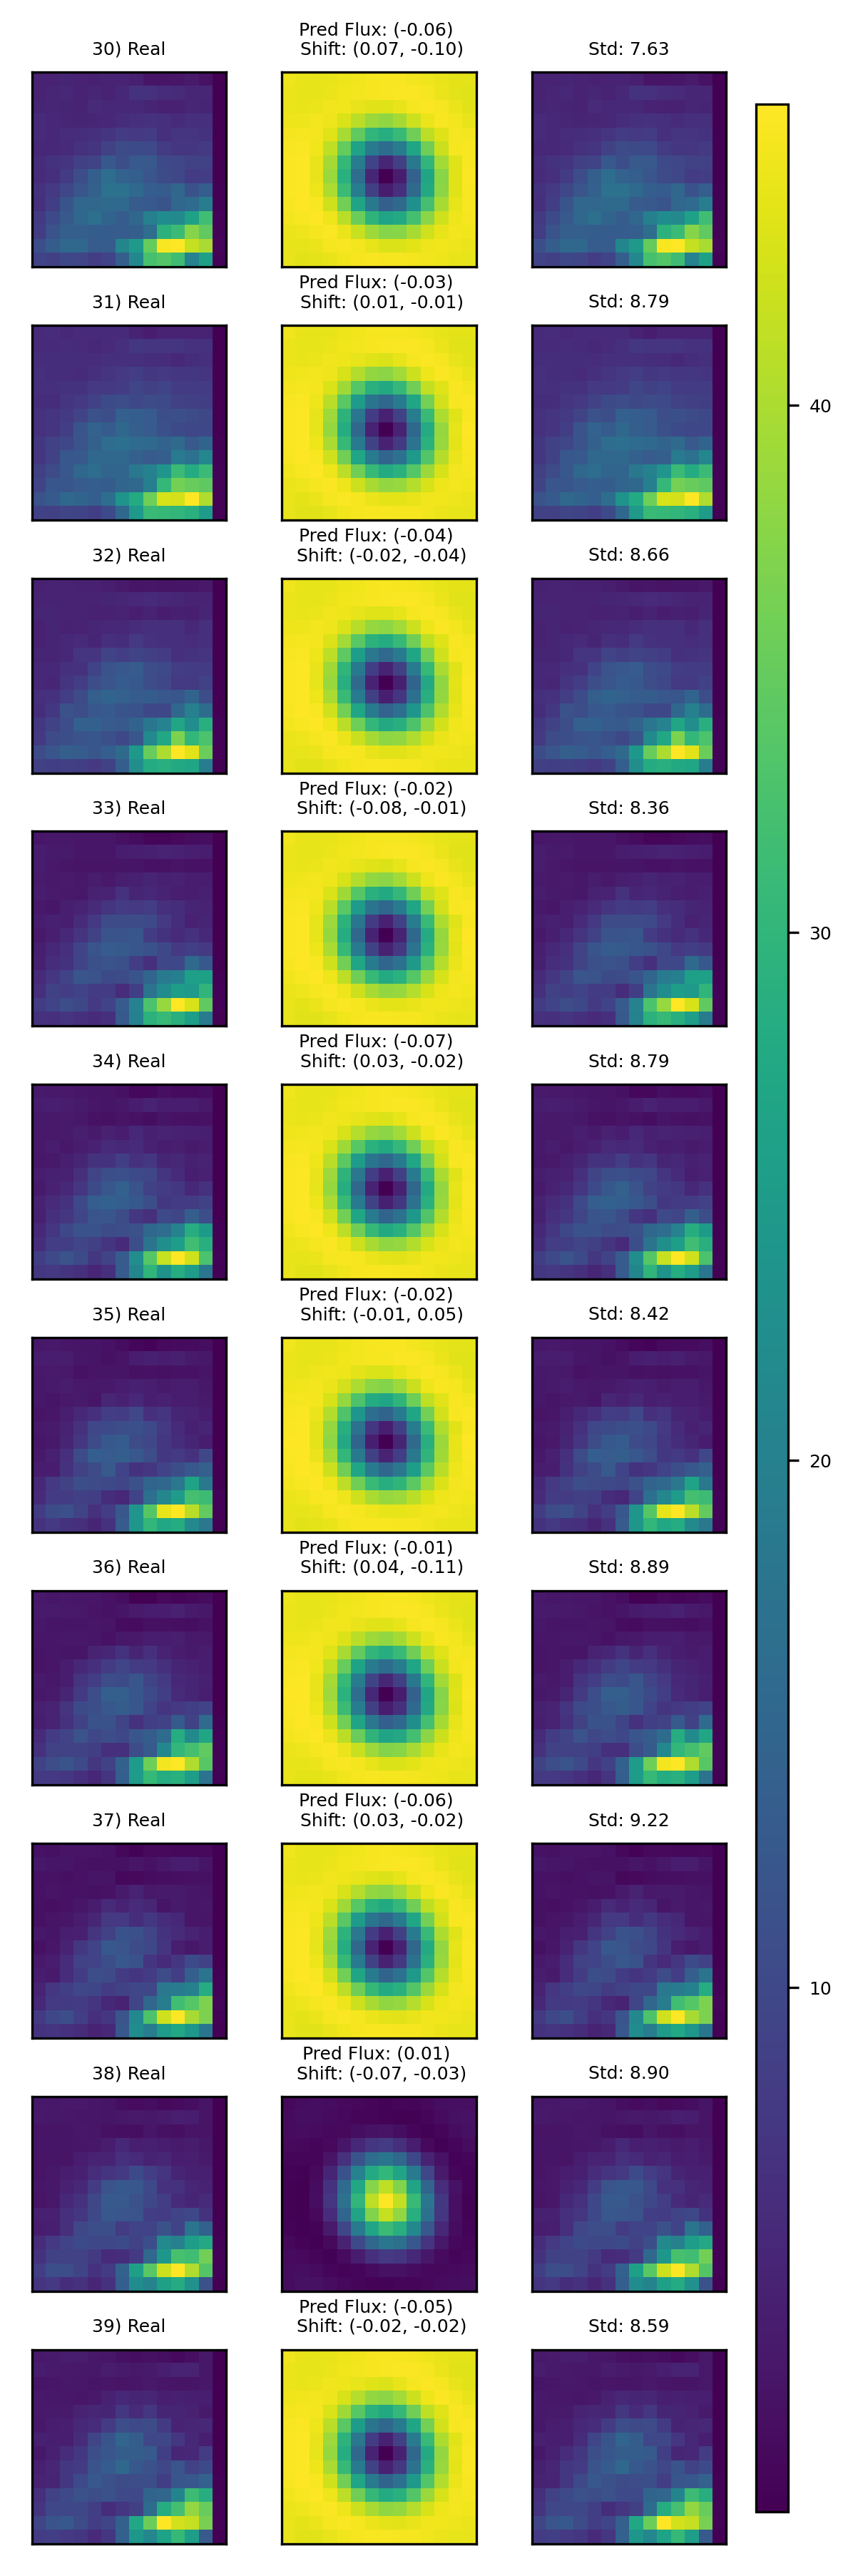

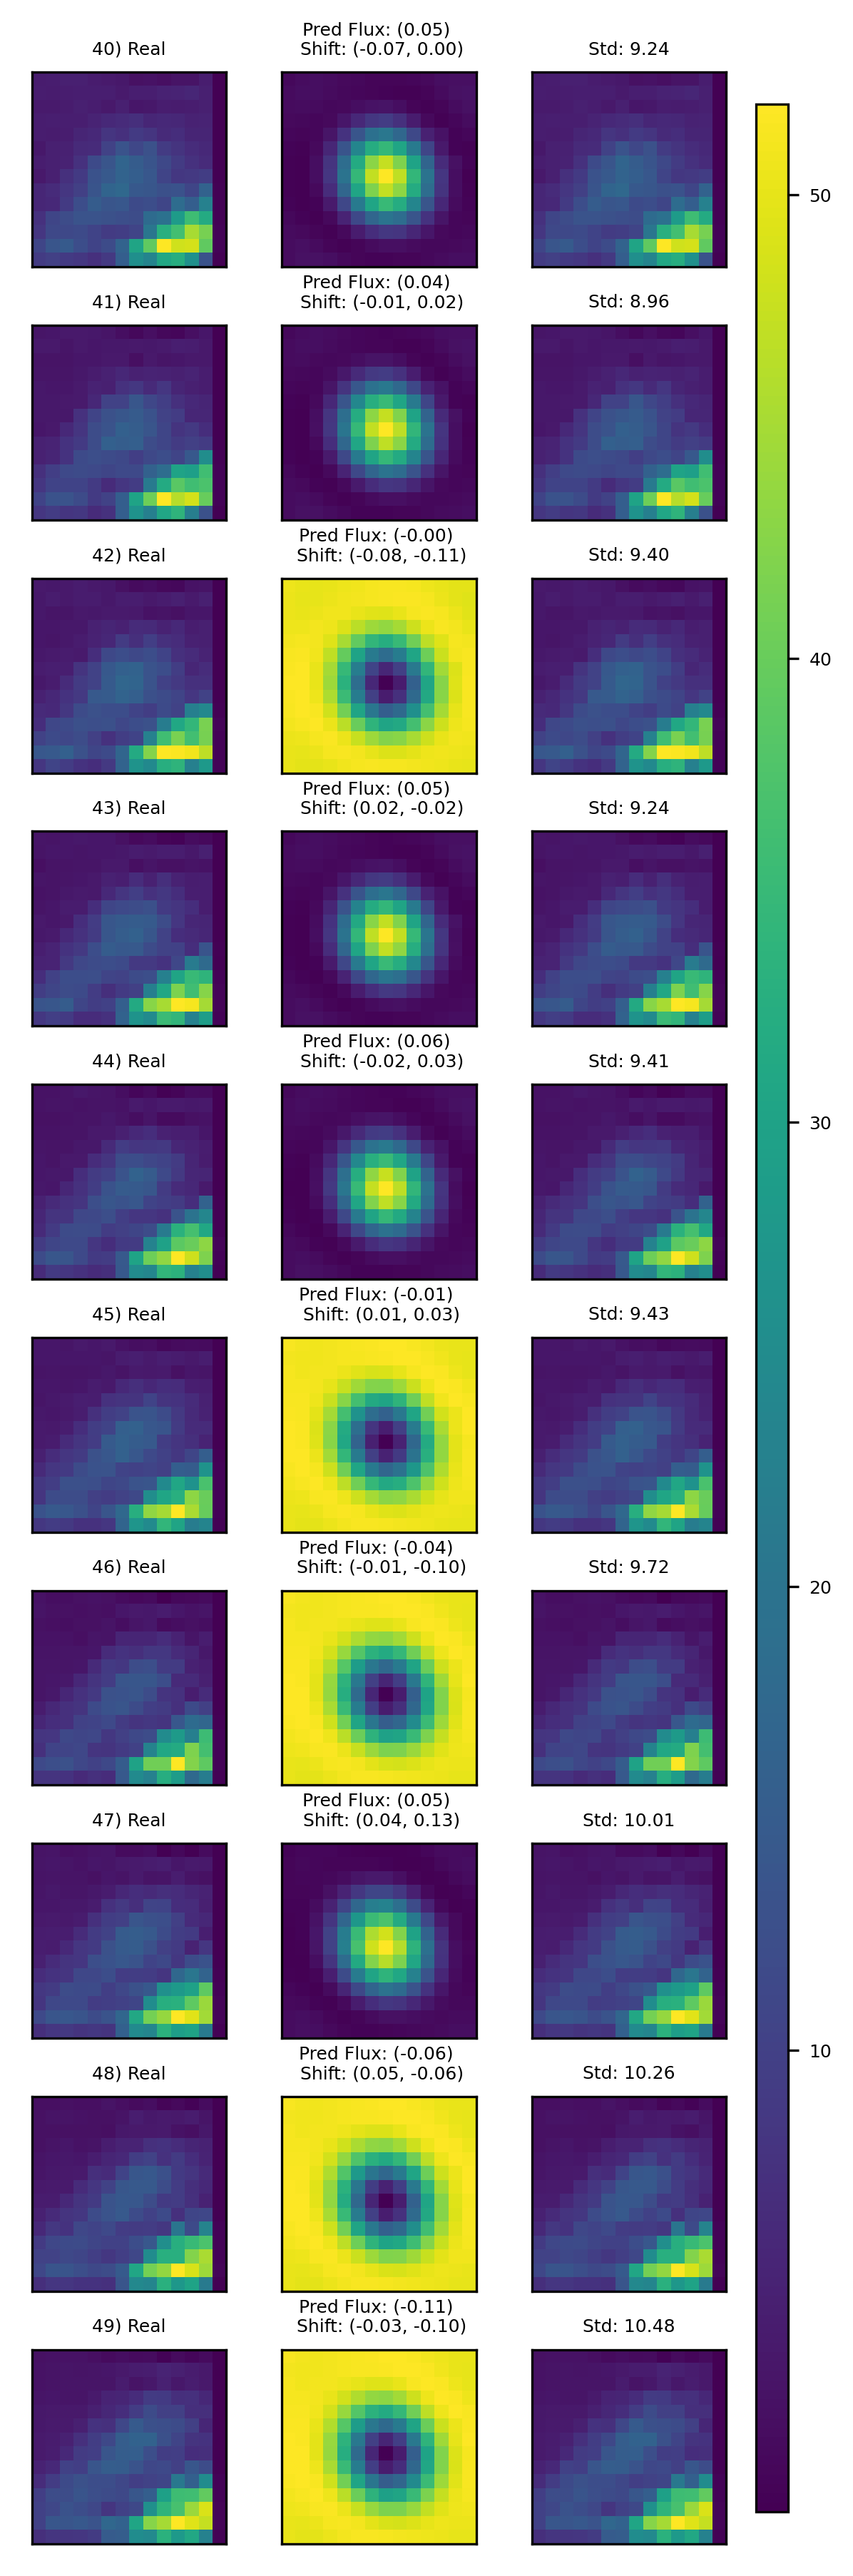

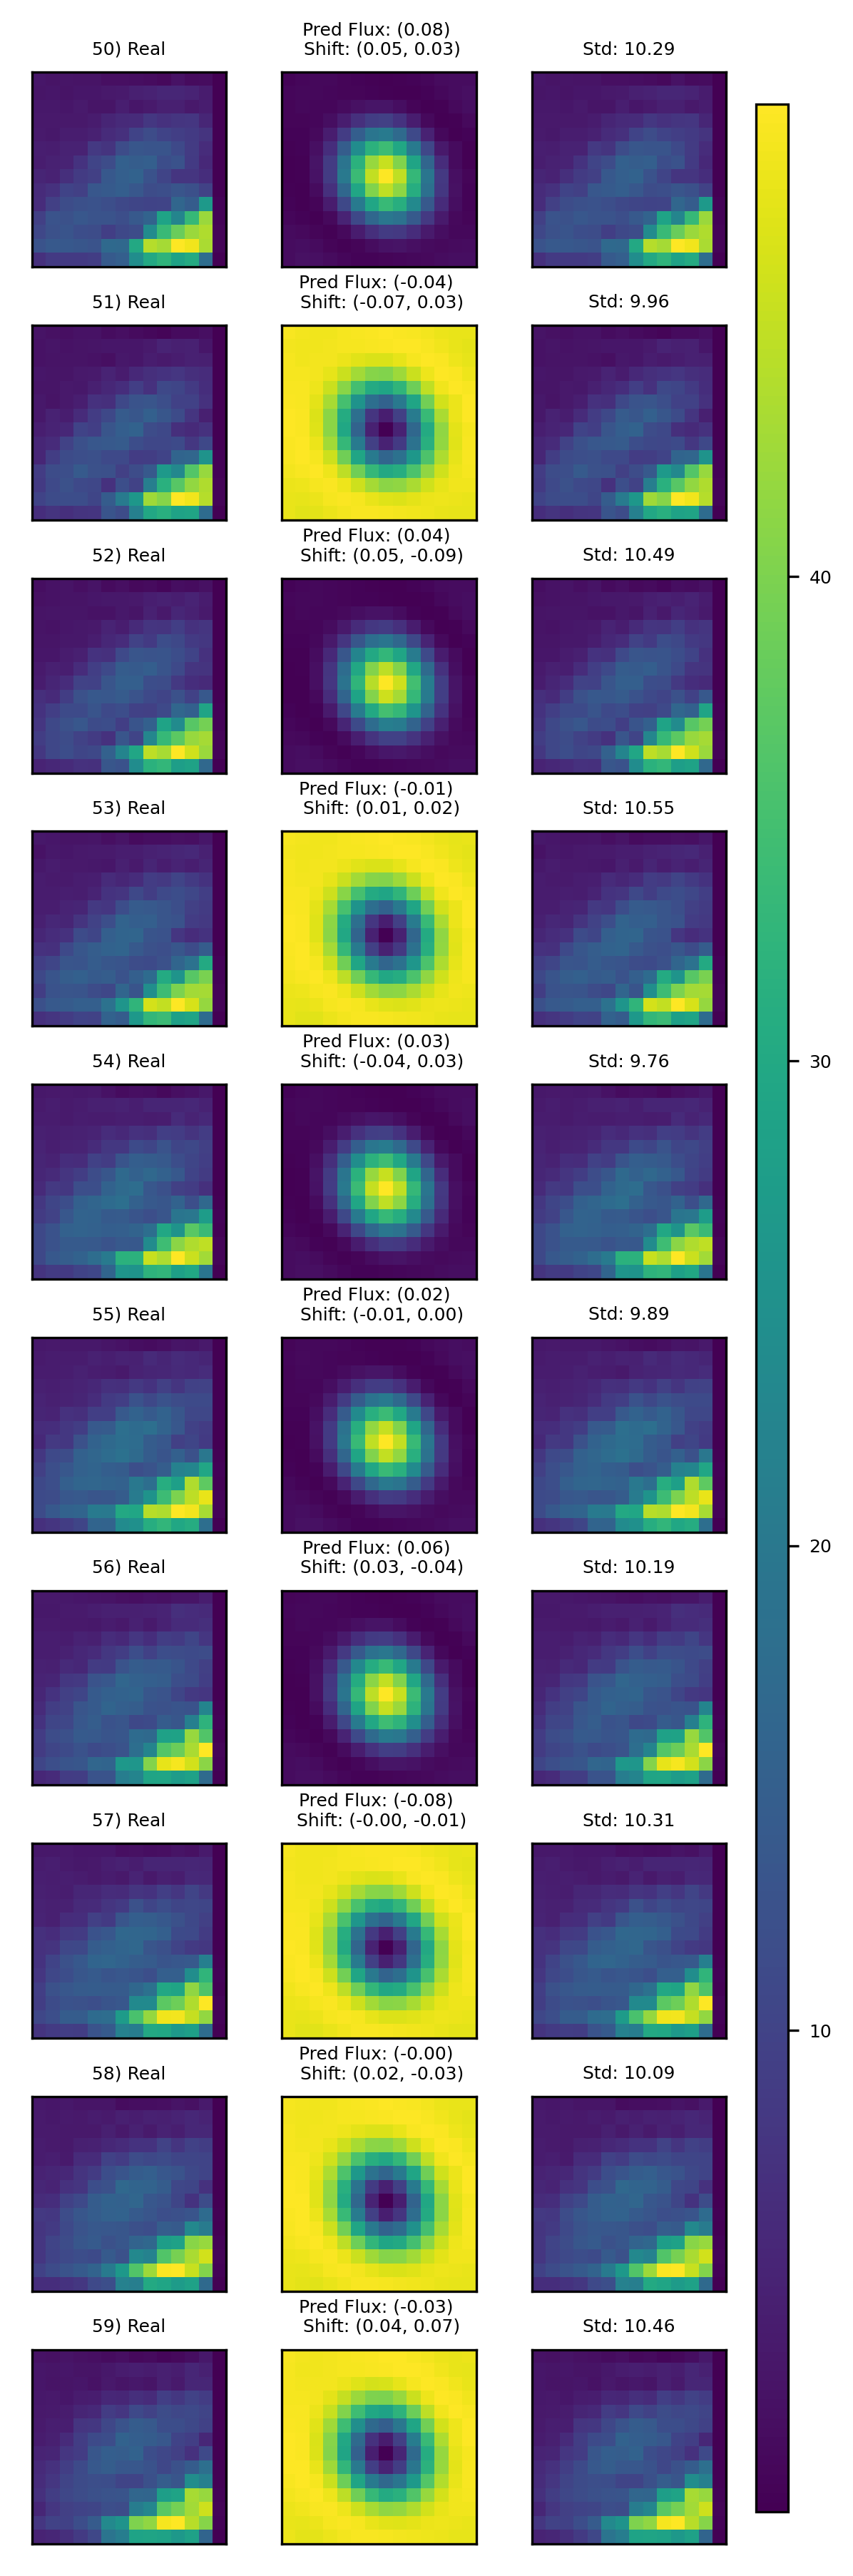

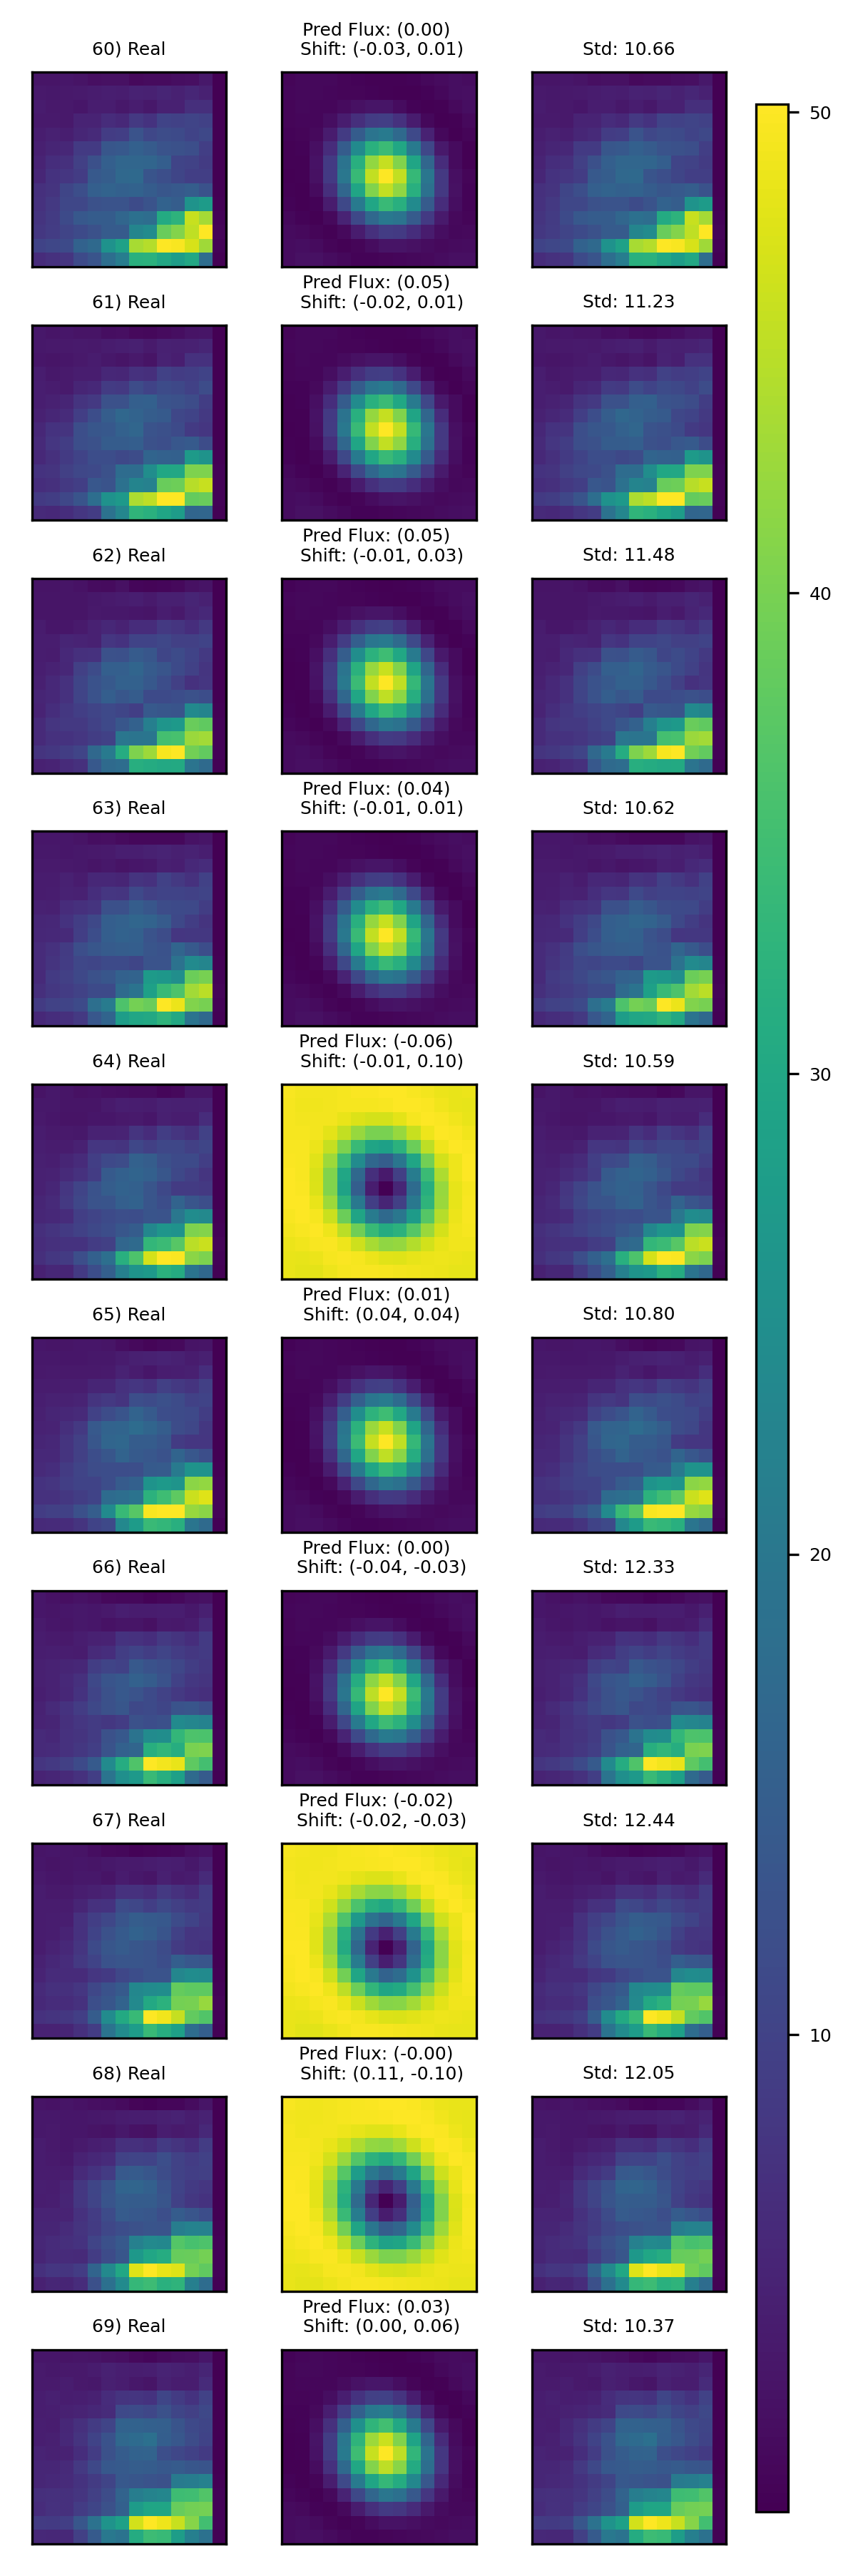

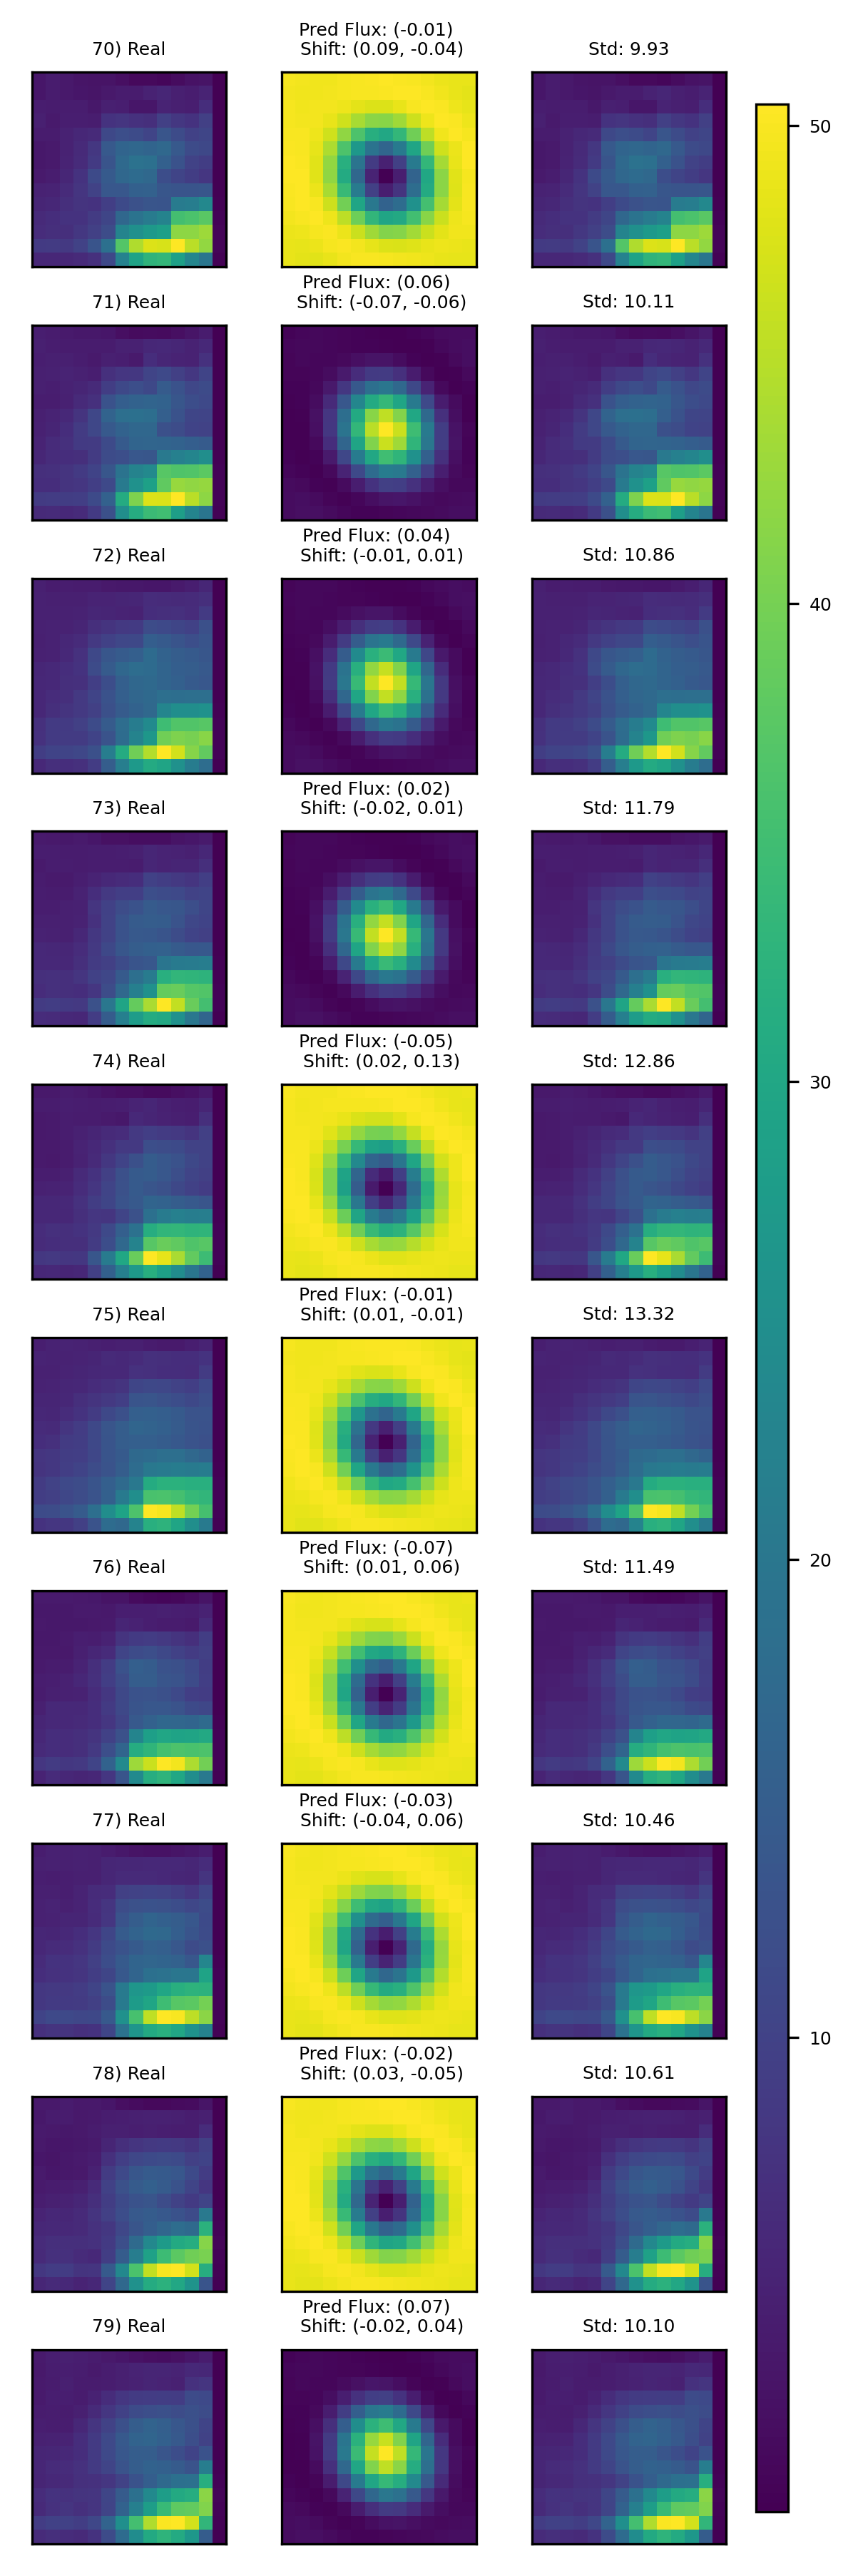

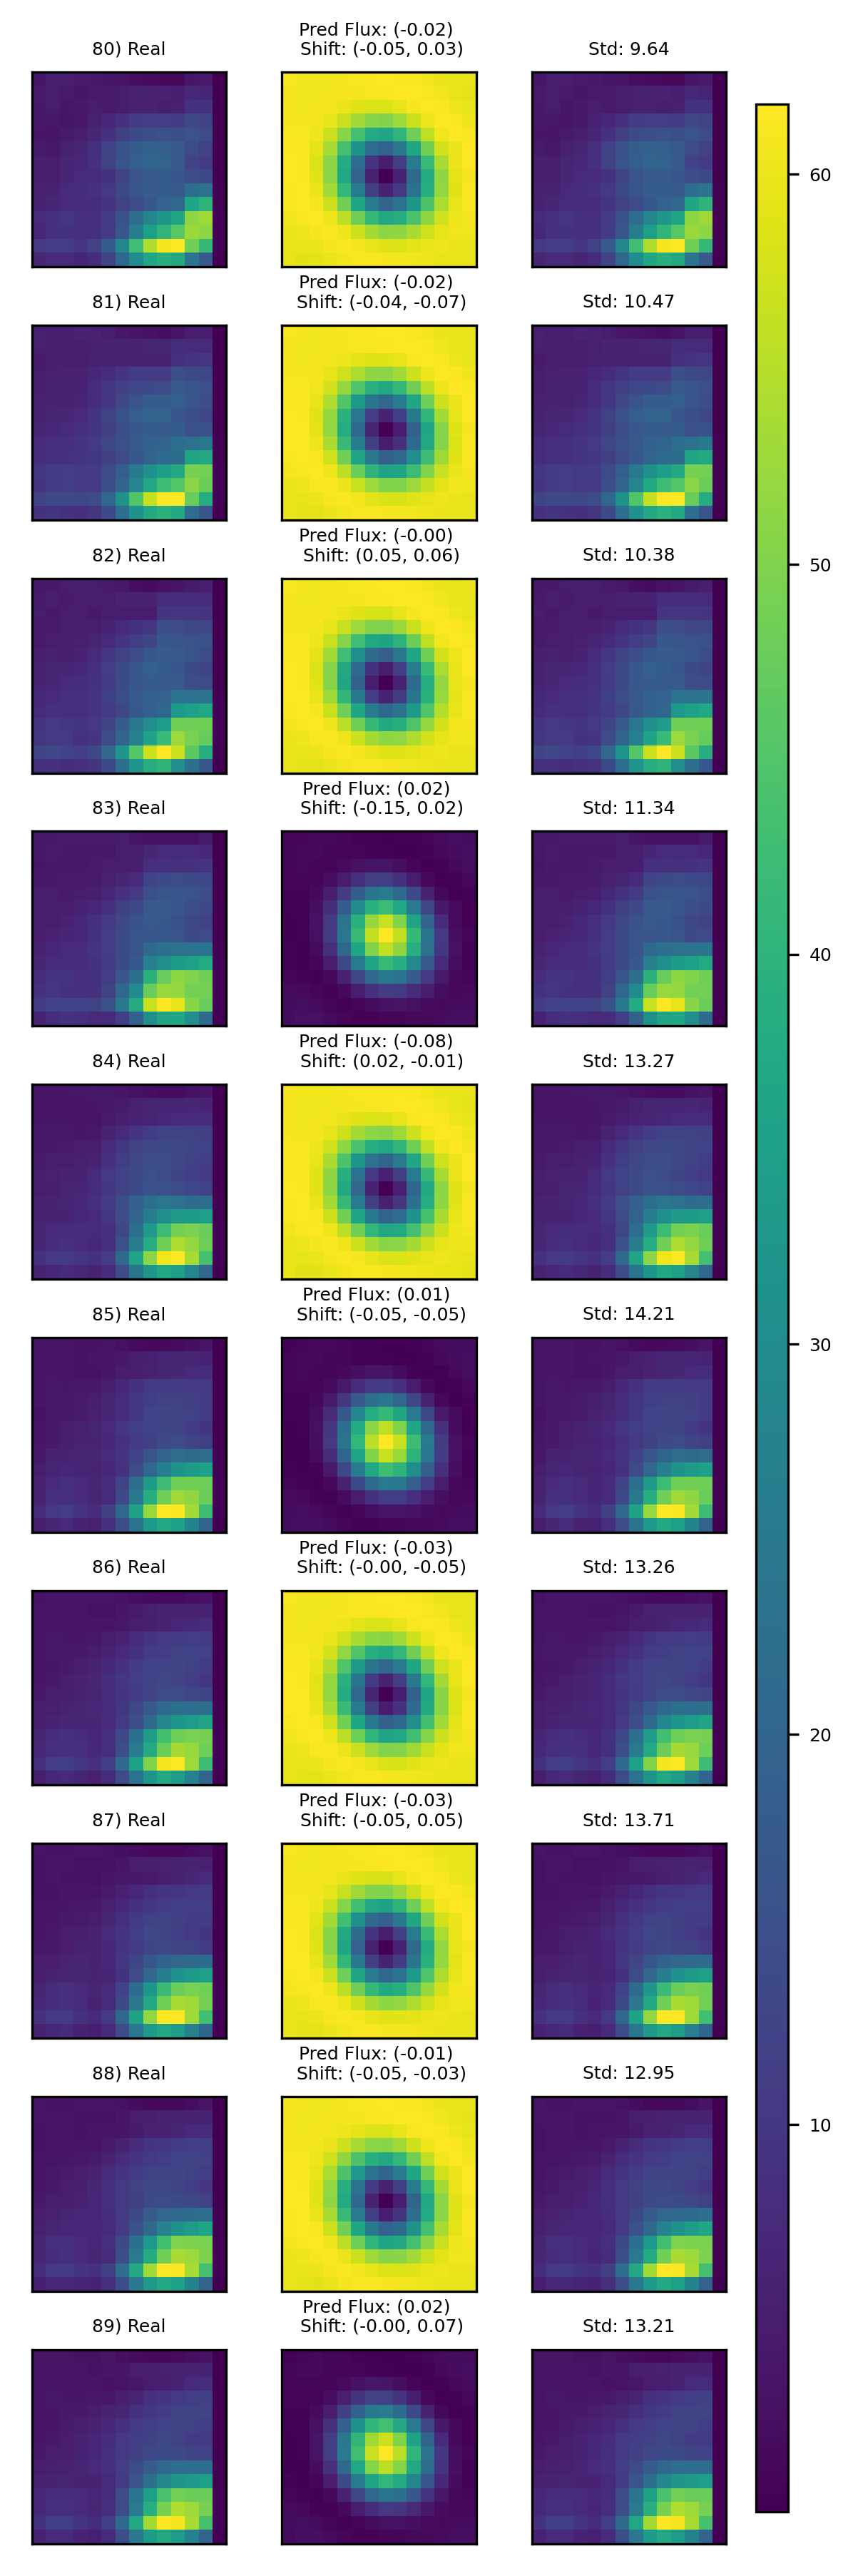

In [18]:
Ntotal = 10
fs = 6
pivots = np.arange(0, fake_comp.shape[0], Ntotal)

os.makedirs(os.path.join(model_path, 'results'), exist_ok=True)
for start in pivots:
    
    fig, axes = plt.subplots(Ntotal, 3, dpi=300, figsize=(15, 15),sharex=True, sharey=True,
                            gridspec_kw={'hspace': 0.3, 'wspace': -0.85})


    for i, N in enumerate(range(start, start+Ntotal)):

        vmin = real_comp[N].min()
        vmax = real_comp[N].max()

        axes[i][0].imshow(real_comp[N])#, vmin=vmin, vmax=vmax)
        axes[i][0].set_title(f'{N}) Real', fontsize=fs)

        axes[i][1].imshow(fake_comp[N])#, vmin=vmin, vmax=vmax)
        axes[i][1].set_title('Pred Flux: ({:.2f}) \n Shift: ({:.2f}, {:.2f})'.format(fluxes[N], 
                                                                              shift_coords[N][0],
                                                                              shift_coords[N][1]), fontsize=fs)

        residuals = real_comp[N]-fake_comp[N]
        im = axes[i][2].imshow(residuals)#, vmin=vmin, vmax=vmax)
        axes[i][2].set_title('Std: {:.2f}'.format(np.std(residuals)), fontsize=fs)

        axes[i][0].set_xticks([])
        axes[i][0].set_yticks([])
    
    fig.subplots_adjust(right=0.8)
    cbar_ax = fig.add_axes([0.58, 0.12, 0.01, 0.75])
    cbar_ax.tick_params(labelsize=fs)
    fig.colorbar(im, cax=cbar_ax)
    fig.savefig(os.path.join(model_path, 'results', f'{start}.pdf'), format='pdf', bbox_inches='tight')